### ImageDataGenerator testing

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.11.0'

In [3]:
print("Devices: ", tf.config.list_physical_devices())

Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


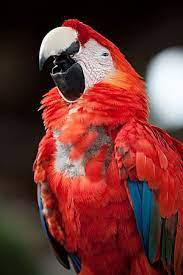

In [9]:
img = load_img('./downloaded_photos/train/parrot/img000097.jpg')
img

In [10]:
data = img_to_array(img)
data.shape

(275, 183, 3)

In [11]:
data

array([[[ 6.,  0.,  0.],
        [ 6.,  0.,  0.],
        [ 6.,  0.,  0.],
        ...,
        [ 6.,  2.,  1.],
        [ 6.,  2.,  1.],
        [ 6.,  2.,  1.]],

       [[ 6.,  0.,  0.],
        [ 6.,  0.,  0.],
        [ 6.,  0.,  0.],
        ...,
        [ 6.,  2.,  1.],
        [ 6.,  2.,  1.],
        [ 6.,  2.,  1.]],

       [[ 6.,  0.,  0.],
        [ 6.,  0.,  0.],
        [ 6.,  0.,  0.],
        ...,
        [ 6.,  2.,  1.],
        [ 6.,  2.,  1.],
        [ 6.,  2.,  1.]],

       ...,

       [[15., 19.,  5.],
        [15., 19.,  5.],
        [16., 20.,  6.],
        ...,
        [80., 29., 25.],
        [52.,  2.,  1.],
        [44.,  0.,  0.]],

       [[15., 19.,  5.],
        [15., 19.,  5.],
        [16., 20.,  6.],
        ...,
        [80., 29., 25.],
        [52.,  2.,  1.],
        [44.,  0.,  0.]],

       [[15., 19.,  5.],
        [15., 19.,  5.],
        [16., 20.,  6.],
        ...,
        [80., 29., 25.],
        [52.,  2.,  1.],
        [44.,  0.,  0.]]

In [12]:
data[1, 1]

array([6., 0., 0.], dtype=float32)

In [13]:
data[-1, -1]

array([44.,  0.,  0.], dtype=float32)

In [14]:
scaled_data = data/255
scaled_data[1,:5]

array([[0.02352941, 0.        , 0.        ],
       [0.02352941, 0.        , 0.        ],
       [0.02352941, 0.        , 0.        ],
       [0.02352941, 0.        , 0.        ],
       [0.02352941, 0.        , 0.        ]], dtype=float32)

In [15]:
samples = expand_dims(data, 0)
samples

array([[[[ 6.,  0.,  0.],
         [ 6.,  0.,  0.],
         [ 6.,  0.,  0.],
         ...,
         [ 6.,  2.,  1.],
         [ 6.,  2.,  1.],
         [ 6.,  2.,  1.]],

        [[ 6.,  0.,  0.],
         [ 6.,  0.,  0.],
         [ 6.,  0.,  0.],
         ...,
         [ 6.,  2.,  1.],
         [ 6.,  2.,  1.],
         [ 6.,  2.,  1.]],

        [[ 6.,  0.,  0.],
         [ 6.,  0.,  0.],
         [ 6.,  0.,  0.],
         ...,
         [ 6.,  2.,  1.],
         [ 6.,  2.,  1.],
         [ 6.,  2.,  1.]],

        ...,

        [[15., 19.,  5.],
         [15., 19.,  5.],
         [16., 20.,  6.],
         ...,
         [80., 29., 25.],
         [52.,  2.,  1.],
         [44.,  0.,  0.]],

        [[15., 19.,  5.],
         [15., 19.,  5.],
         [16., 20.,  6.],
         ...,
         [80., 29., 25.],
         [52.,  2.,  1.],
         [44.,  0.,  0.]],

        [[15., 19.,  5.],
         [15., 19.,  5.],
         [16., 20.,  6.],
         ...,
         [80., 29., 25.],
        

In [16]:
samples.shape

(1, 275, 183, 3)

In [17]:
data.shape

(275, 183, 3)

In [18]:
data == samples[0]

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [19]:
def plot_images(iterator):
    plt.figure(figsize=(16, 16))
    for i in range(12):
        plt.subplot(4,3,i+1)
        batch = iterator.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)

    plt.show()
    

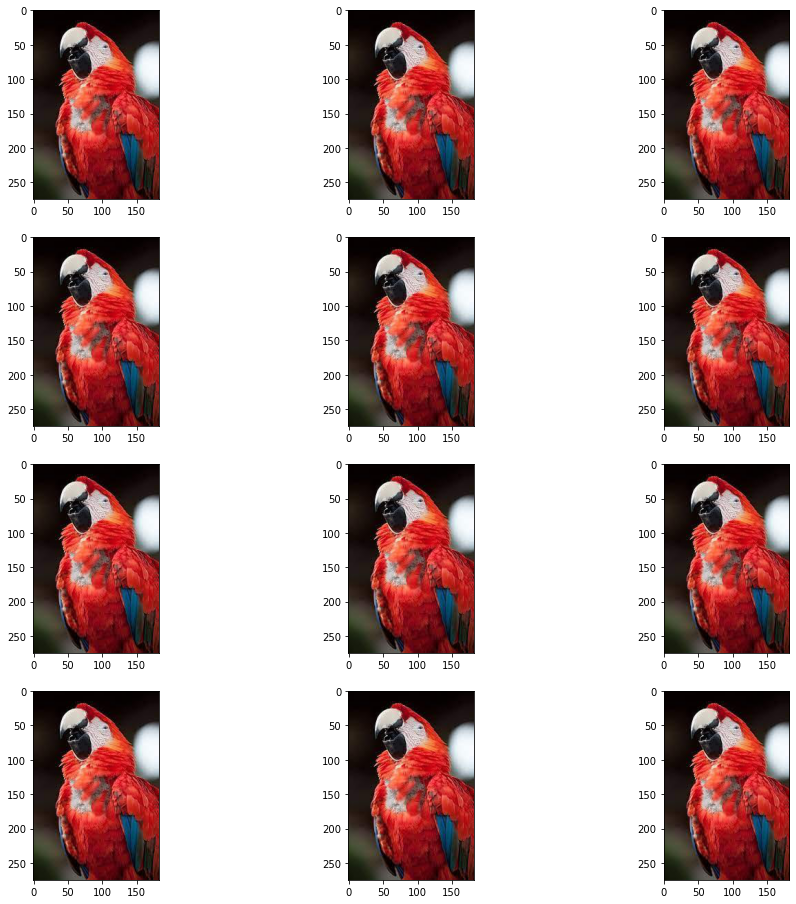

In [20]:
generator = ImageDataGenerator()

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

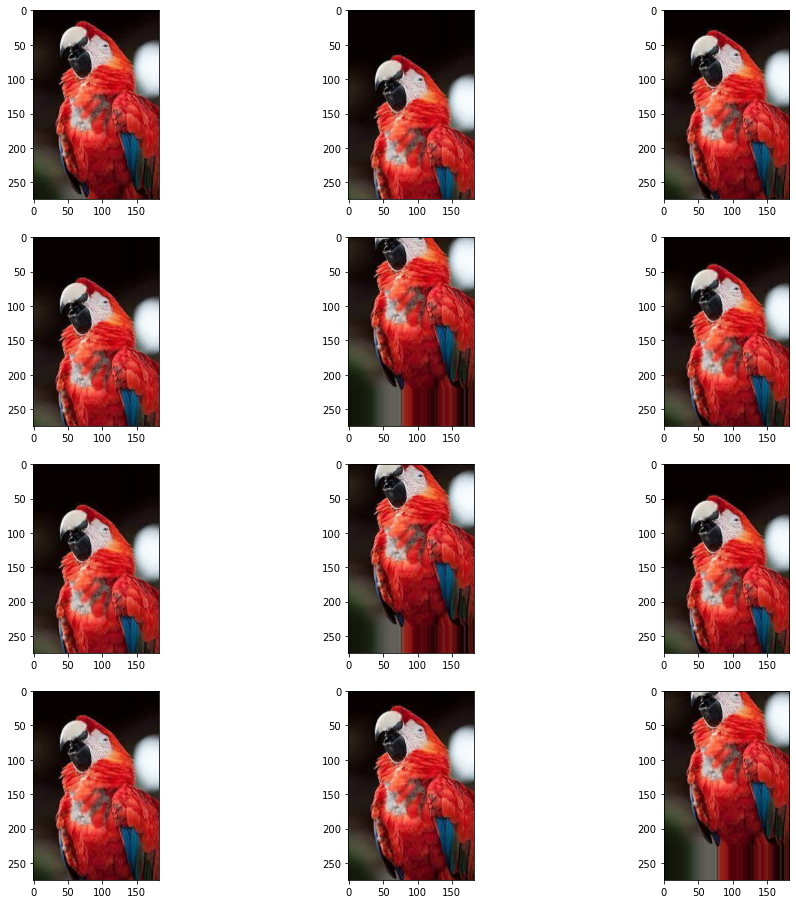

In [21]:
generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='nearest')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

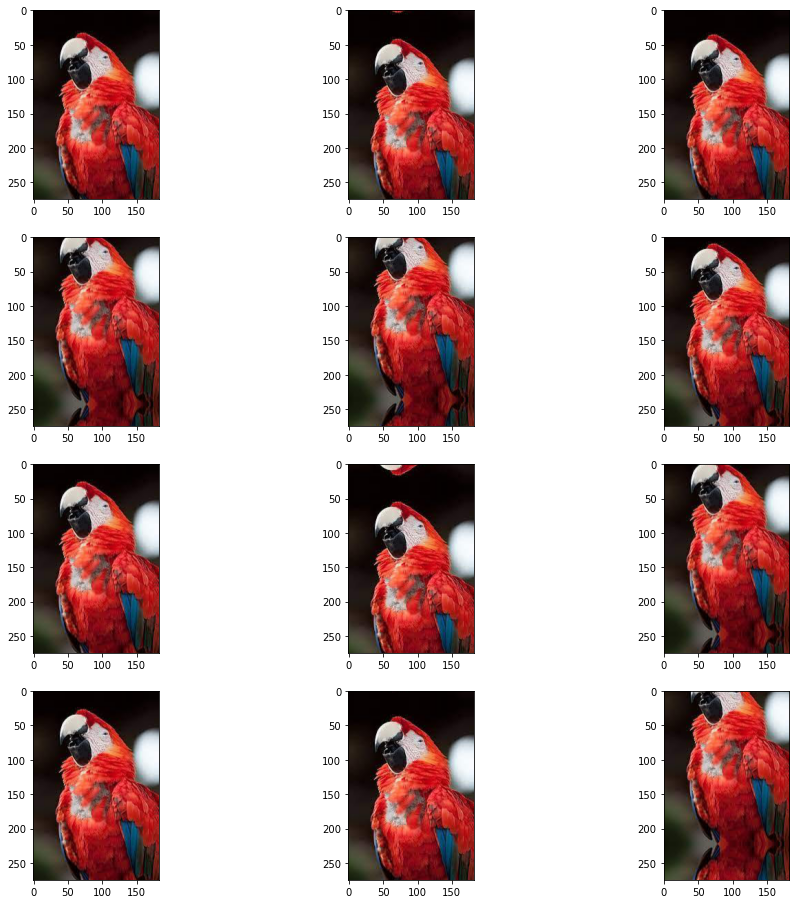

In [22]:
generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='reflect')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

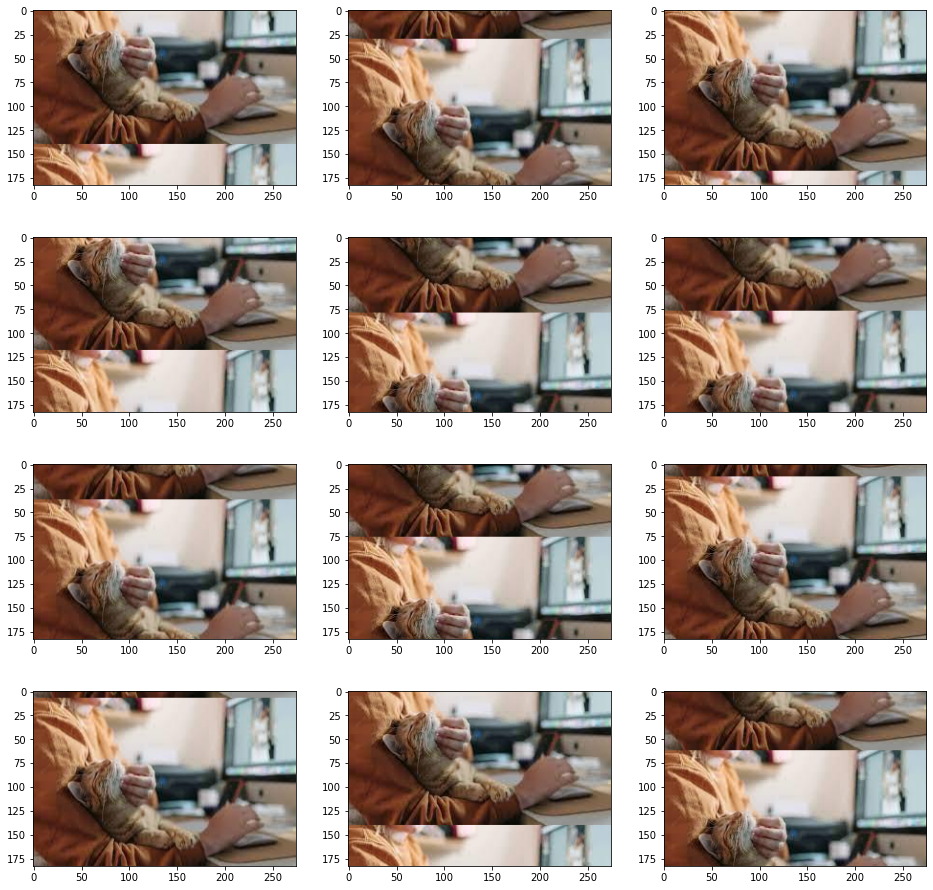

In [124]:
generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='wrap')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

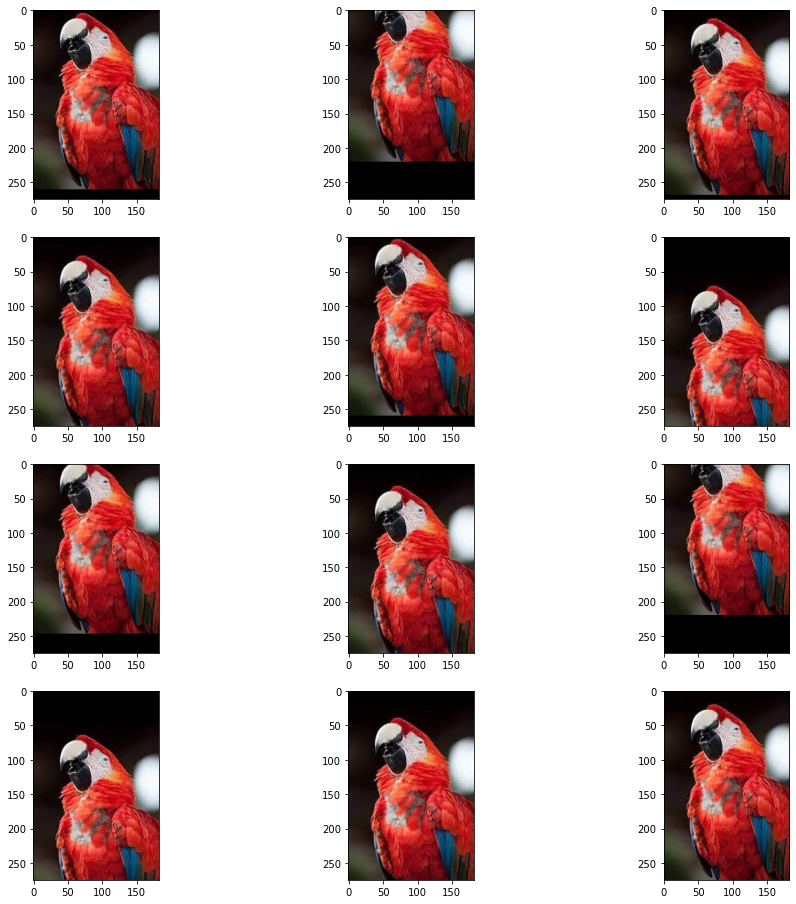

In [23]:
generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='constant')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

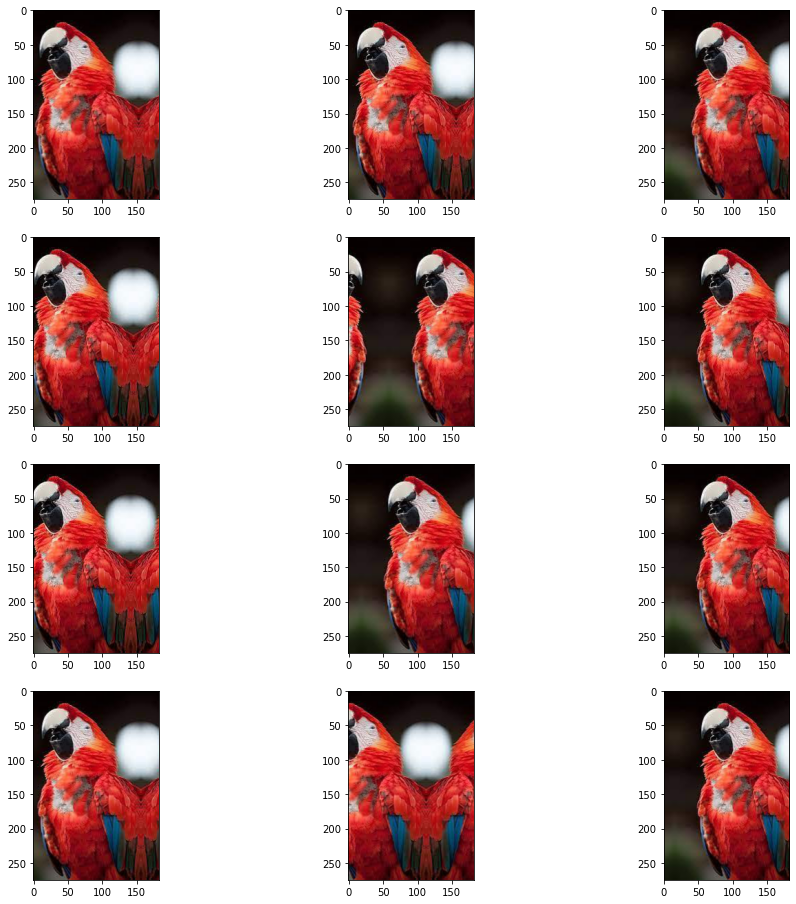

In [24]:
generator = ImageDataGenerator(height_shift_range=0.3, fill_mode='reflect')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

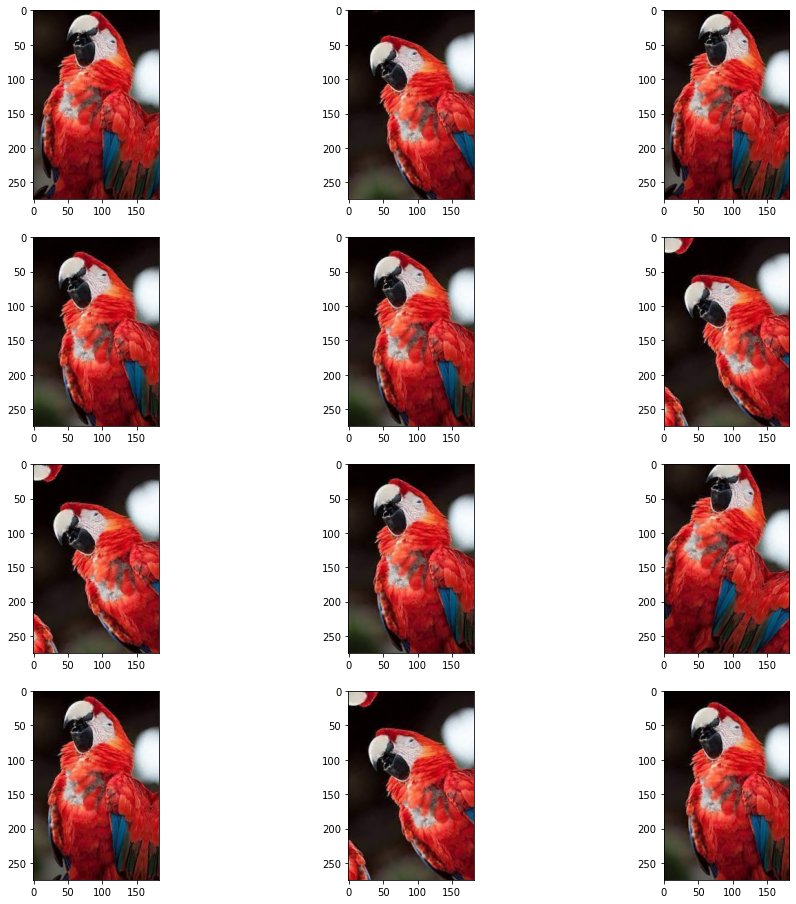

In [25]:
generator = ImageDataGenerator(rotation_range=30, fill_mode='reflect')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

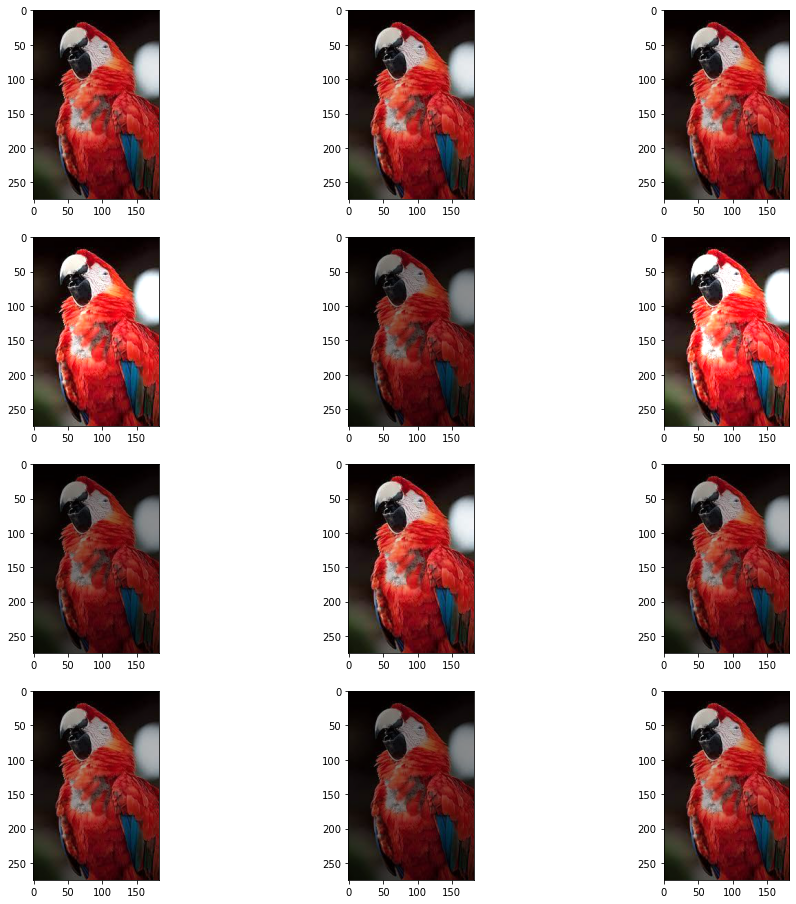

In [26]:
generator = ImageDataGenerator(brightness_range=(0.5, 1.5), fill_mode='reflect')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

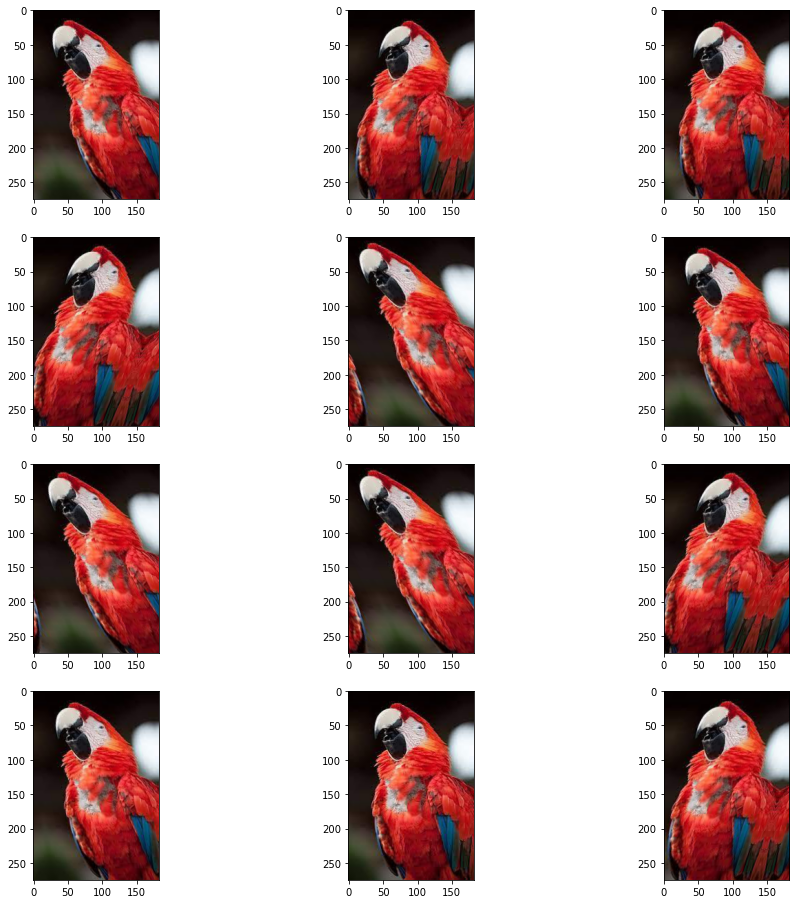

In [27]:
generator = ImageDataGenerator(shear_range=30, fill_mode='reflect')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

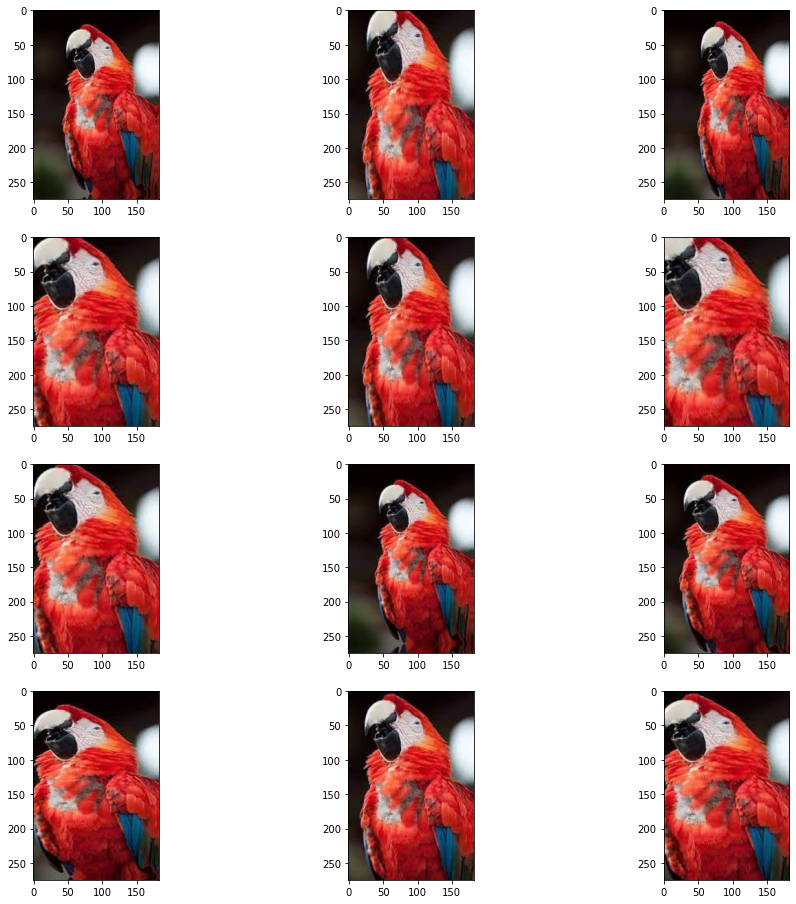

In [28]:
generator = ImageDataGenerator(zoom_range=0.4, fill_mode='reflect')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

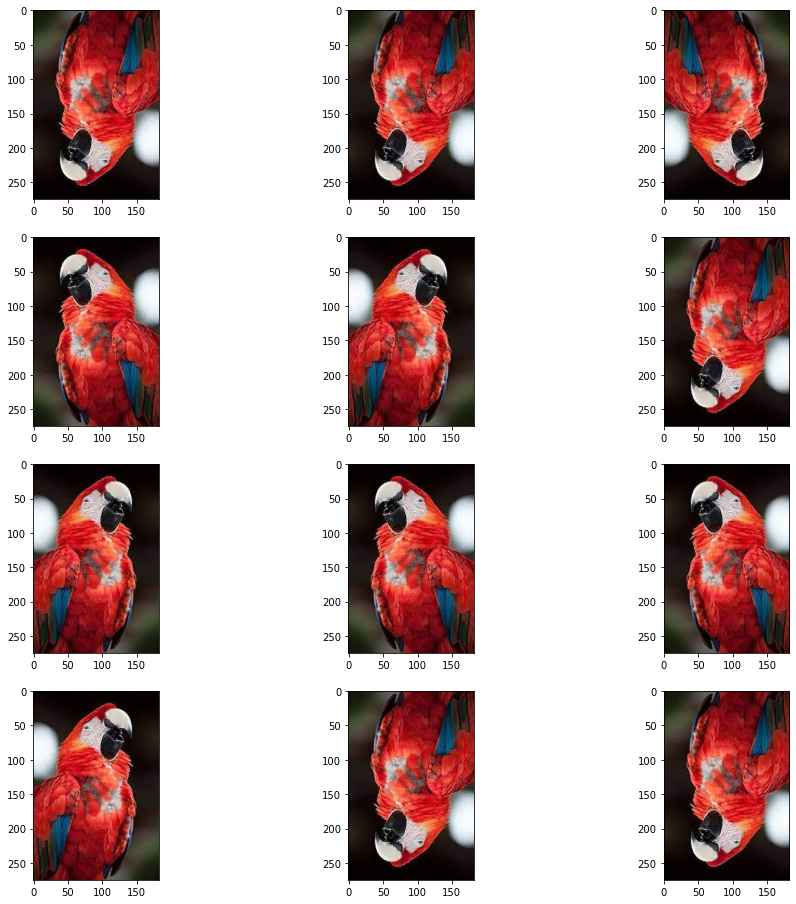

In [29]:
generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)

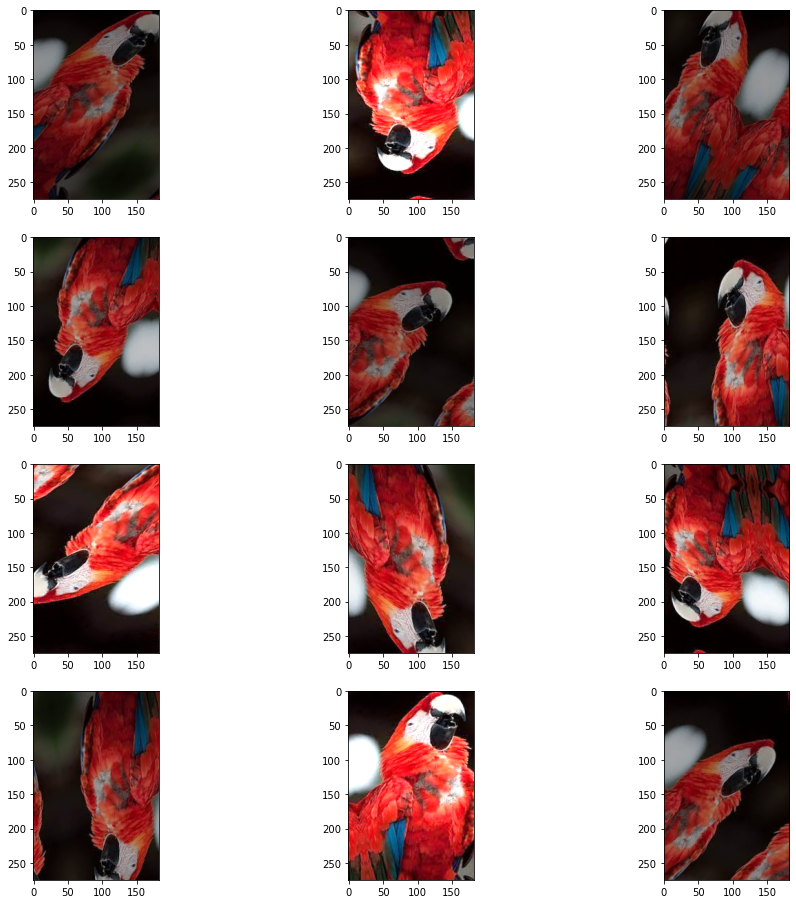

In [30]:
# putting it all together

generator = ImageDataGenerator(width_shift_range=0.15,
                               height_shift_range=0.15,
                               rotation_range=30,
                               brightness_range=(0.5, 1.5),
                               shear_range=30,
                               zoom_range=0.2,
                               horizontal_flip=True, 
                               vertical_flip=True,
                               fill_mode='reflect')

iterator = generator.flow(samples, batch_size=1)

plot_images(iterator)